### Inspect filtering with ACAE  
Use output for the entire set and check reconstruction errors - image by image

In [1]:
import json
import seaborn as sn
import os 
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import shutil
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# set up font for export to make it illustrator friendly
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [3]:
# import JSON file
with open('/home/aogorodnikov/aae_filter_classes/classes_rgb_corrected_2Dlatent.json', 'r') as json_file:  
    data = json.load(json_file)

## Distributions  
Compare distributions of losses within classes

In [4]:
df = pd.DataFrame(data)
df['phenotype'] = df.image.str.split(pat='/', expand=True).iloc[:,4]

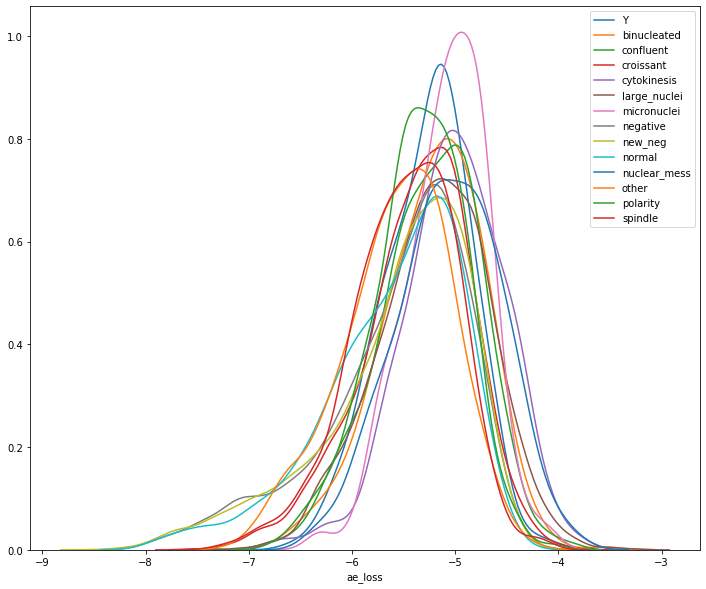

In [5]:
fig, ax = plt.subplots(figsize=(12, 10))
for l in df.phenotype.unique():
    to_plot = df[df.phenotype == l]
    g = sns.distplot(np.log(to_plot.ae_loss), hist=False, label=l)

/home/aogorodnikov/anaconda3/envs/imgSudoku/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/home/aogorodnikov/anaconda3/envs/imgSudoku/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


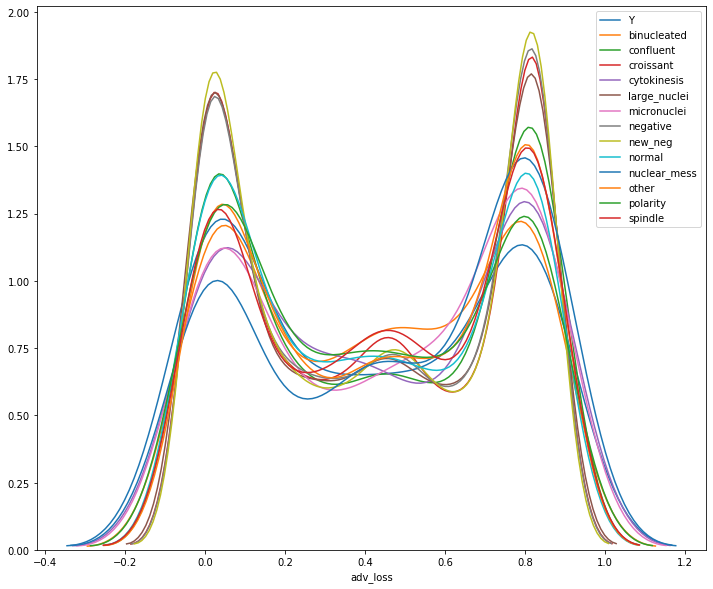

In [6]:
fig, ax = plt.subplots(figsize=(12, 10))
for l in df.phenotype.unique():
    to_plot = df[df.phenotype == l]
    g = sns.distplot(to_plot.adv_loss, hist=False, label=l)

In [13]:
to_plot = ['normal', "cytokinesis"]
df_sub = df[df.phenotype.isin(to_plot)]

In [14]:
df_sub.shape

(1396, 4)

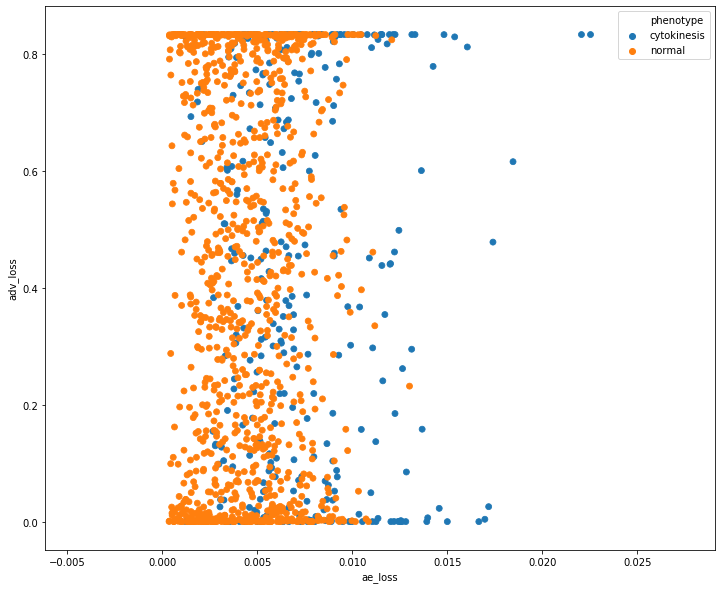

In [15]:
fig, ax = plt.subplots(figsize=(12, 10))


ax = sn.scatterplot(df_sub.ae_loss, df_sub.adv_loss, hue=df_sub.phenotype, edgecolor=None)


In [23]:
pd.DataFrame(data['ae_loss']).describe()

,0
count,29056.000000
mean,0.005199
std,0.002857
min,0.000209
25%,0.003151
50%,0.004845
75%,0.006804
max,0.038863


In [24]:
pd.DataFrame(data['adv_loss']).describe()

,0
count,29049.000000
mean,0.425004
std,0.324765
min,0.000000
25%,0.074338
50%,0.436700
75%,0.791153
max,0.832555


In [25]:
to_plot = ['normal']
df_sub = df[df.phenotype.isin(to_plot)]

In [16]:
df_sub.iloc[:17,:]

,image,ae_loss,adv_loss,phenotype
24997,/home/aogorodnikov/classes_rgb_corrected/norma...,0.004720,0.011762,normal
24998,/home/aogorodnikov/classes_rgb_corrected/norma...,0.005135,0.496167,normal
24999,/home/aogorodnikov/classes_rgb_corrected/norma...,0.003820,0.781148,normal
25000,/home/aogorodnikov/classes_rgb_corrected/norma...,0.004818,0.615085,normal
25001,/home/aogorodnikov/classes_rgb_corrected/norma...,0.006918,0.278295,normal
25002,/home/aogorodnikov/classes_rgb_corrected/norma...,0.007345,0.422950,normal
25003,/home/aogorodnikov/classes_rgb_corrected/norma...,0.003979,0.501710,normal
25004,/home/aogorodnikov/classes_rgb_corrected/norma...,0.009417,0.461972,normal
25005,/home/aogorodnikov/classes_rgb_corrected/norma...,0.004250,0.215018,normal
25006,/home/aogorodnikov/classes_rgb_corrected/norma...,0.002452,0.373485,normal


In [24]:
df_sub.iloc[:17,0].str.split(pat="/", expand=True)

,0,1,2,3,4,5
24997,,home,aogorodnikov,classes_rgb_corrected,normal,Pt11_r02c12_f01_0060.tif
24998,,home,aogorodnikov,classes_rgb_corrected,normal,Pt11_r02c12_f01_0073.tif
24999,,home,aogorodnikov,classes_rgb_corrected,normal,Pt11_r02c12_f01_0107.tif
25000,,home,aogorodnikov,classes_rgb_corrected,normal,Pt11_r02c12_f01_0111.tif
25001,,home,aogorodnikov,classes_rgb_corrected,normal,Pt11_r02c12_f01_0121.tif
25002,,home,aogorodnikov,classes_rgb_corrected,normal,Pt11_r02c12_f01_0122.tif
25003,,home,aogorodnikov,classes_rgb_corrected,normal,Pt11_r02c12_f01_0127.tif
25004,,home,aogorodnikov,classes_rgb_corrected,normal,Pt11_r02c12_f01_0168.tif
25005,,home,aogorodnikov,classes_rgb_corrected,normal,Pt11_r02c12_f01_0170.tif
25006,,home,aogorodnikov,classes_rgb_corrected,normal,Pt11_r02c12_f01_0184.tif


In [ ]:
df_sub